## The Sparks Foundation

### Data Analytics and Buisness Analysis

NAME: SIDDHI GAUTAM SHAH

PROJECT: To predict the optimum number of cluster and to represent it visually.


## To predict the optimum number of clusters and represent it viusually

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [15]:
raw_df = pd.read_csv('Iris.csv')

In [16]:
raw_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking for the missing values.

In [17]:
raw_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Here, We can see that there are no missing value and the data is clean.

In [19]:
raw_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
df=raw_df.drop('Id', axis=1)
df = df.iloc[:,[0,1,2,3]].values
df

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

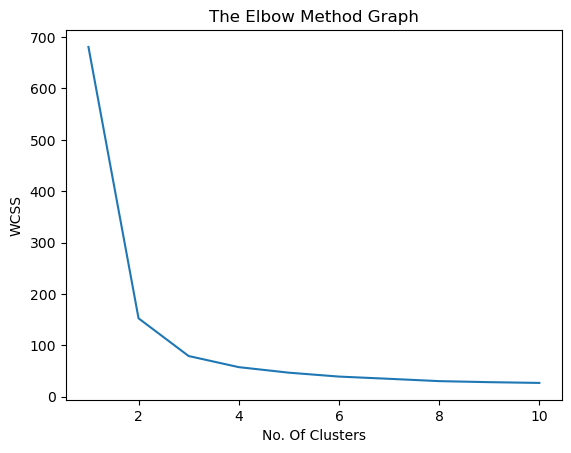

In [21]:
#Using the elbow method to find out the optimal number of clusters. KMeans class from the sklearn library.

from sklearn.cluster import KMeans
wcss=[]

# This loop will fit the k-means algorithm to our data and second we will compute the within cluster sum of squares and 
#appended to our wcss list.

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    
    #i above is between 1-10 numbers. init parameter is the random #initialization method  
    #we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
    #find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
    #the next parameter is n_init which is the number of times the #K_means algorithm will be run with
    #different initial centroid.
    
    
    kmeans.fit(df)
    #kmeans algorithm fits to the df dataset
    
    wcss.append(kmeans.inertia_)
    
    #kmeans inertia_ attribute is:  Sum of squared distances of samples to their closest cluster center.
    
# Plot the elbow graph    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.show()
    

#### From the Elbow graph we could see that the elbow occurs at 3 and this is when the WCSS doesn't decrease significantly after every iteration. Hence, we choose no. of cluster as 3.

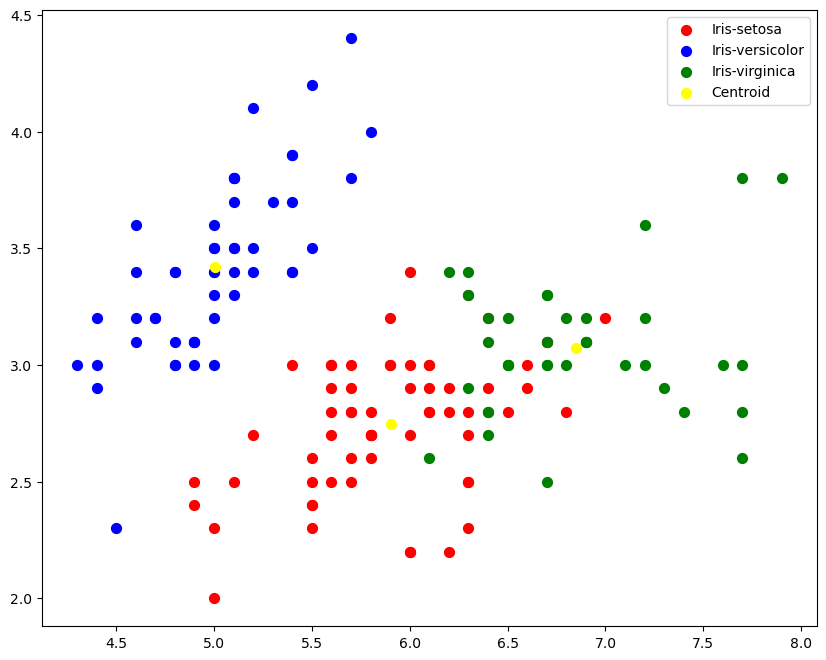

In [22]:
#Applying K-means to the dataset.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_means = kmeans.fit_predict(df)

#Visualising the clusters.
plt.figure(figsize=(10,8))
plt.scatter(df[y_means==0,0], df[y_means==0,1], s=50, c='red', label='Iris-setosa')
plt.scatter(df[y_means==1,0], df[y_means==1,1], s=50, c='blue', label='Iris-versicolor')
plt.scatter(df[y_means==2,0], df[y_means==2,1], s=50, c='green', label='Iris-virginica')

#Plot centroids

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=50, c='yellow', label='Centroid')

plt.legend()
plt.show()